### 과대적합, 과소적합, 일반화
##### 과대적합(Overfitting)
- 훈련 세트에 너무 맞추어져 있어, 테스트 세트에 성능 저하
- 규칙(패턴)이 너무 많거나, 특정 대상에게만 몰려있음을 의미
- 학습을 너무 많이 했을 때 발생
- train score 상, test 중간 정도

##### 과소적합(Underfitting)
- 훈련 세트를 충분히 반영하지 못해, 훈련세트/테스트세트 모두 성능 저하
- 규칙을 찾음에 있어서 규칙을 너무 못 찾음
- 학습을 너무 못했거나, 데이터가 충분하지 않는 경우
- train 하, test 하

##### 일반화(Generalization)
- 훈련 세트로 학습한 모델이 테스트 세트에 대해 정확히 예측하도록 하는 것
- 규칙을 적당히 찾음
- train 중상, test 중상

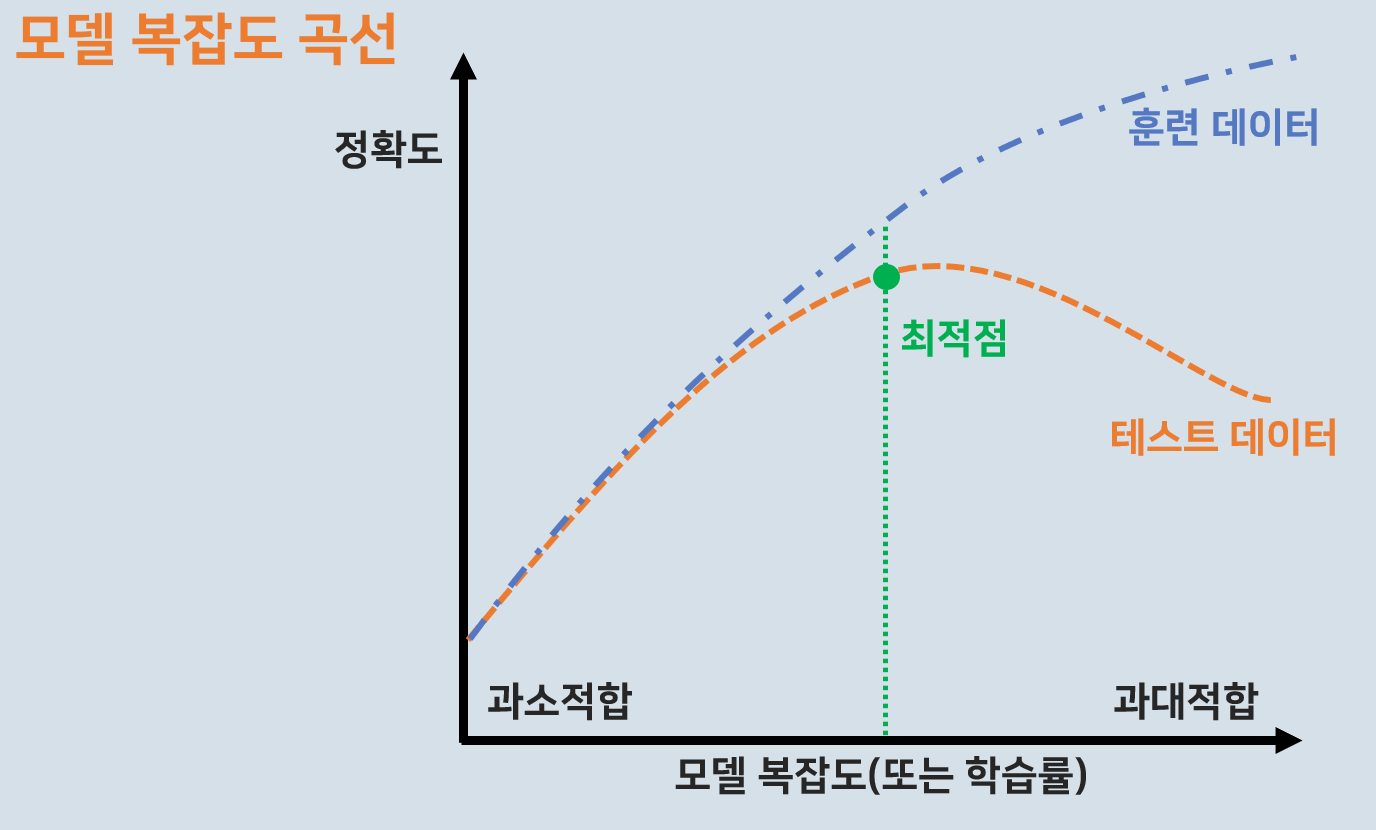

### 1.문제정의
- knn 모델을 사용해서 붓꽃데이터(iris) 분류
    - 클래스 : 3ea

### 2.데이터 수집

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# iris 데이터 불러오기 (sklearn 제공)
from sklearn.datasets import load_iris

# 모델, 정확도 측정도 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

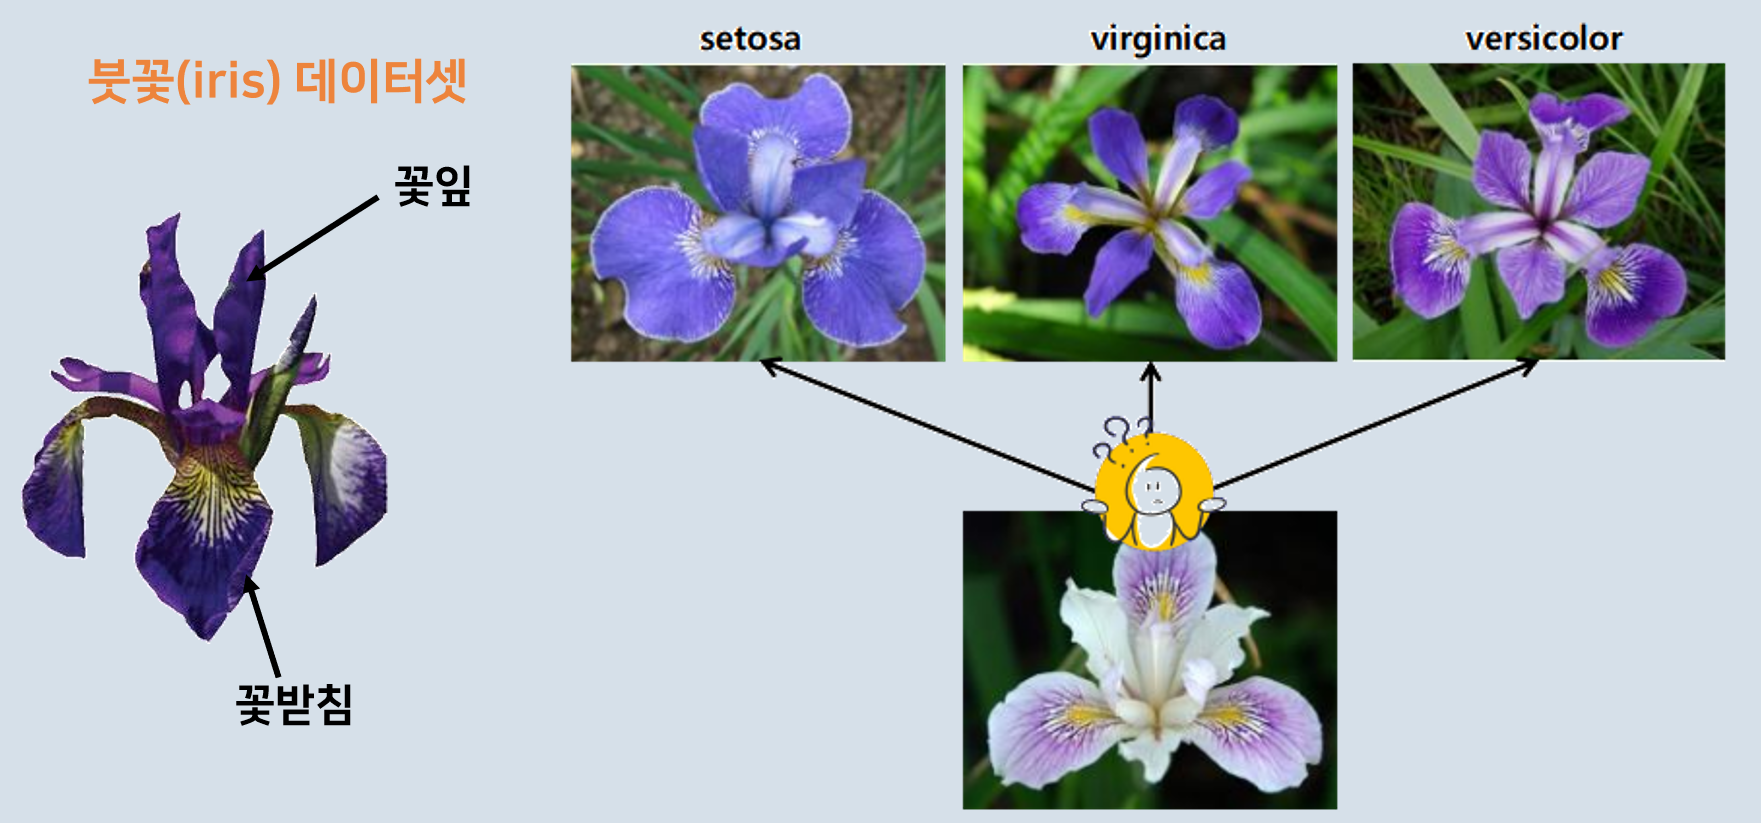

In [25]:
# iris 데이터 확인
iris_data = load_iris()
# 번치(다발) 객체 (딕셔너리 활용) -> sklearn에서 제공되는 데이터셋

In [26]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
# 0 : setosa, 1 : versicolor, 2 : virginica
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
# 특성 이름 확인
iris_data['feature_names']

# sepal length (cm) : 꽃받침 길이
# sepal width (cm) : 꽃받침 너비
# petal length (cm) : 꽃잎 길이
# petal width (cm) : 꽃잎 너비

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [29]:
# 데이터 기술통계량(요약정보) 확인
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [30]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 3.EDA
### 4.데이터 전처리

In [31]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# 데이터 분리
X = iris_df
y = iris_data['target']

In [33]:
y
# y데이터를 확인해보니, 클래스가 편향되어 있음
# 이 상태로 분할할 경우 과적합일 확률이 높음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
# 데이터 분리 도구
from sklearn.model_selection import train_test_split
# train 셋과 test 셋으로 분리하는 도구

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 2024, 
                                                    stratify = y)
# test_size : 테스트 셋의 비율
# random_state : 랜덤 샘플링 결과 고정(난수 고정)
# stratify(분류시에만 활용) : y 클래스 비율을 동일한 비율로 분할
# → train과 test간 클래스 균형을 이루기 위함

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [36]:
# 각각의 고유값들의 개수를 확인하기 위해, Series 형변환 후 value_counts() 확인
pd.Series(y_train).value_counts()

1    35
2    35
0    35
Name: count, dtype: int64

In [37]:
pd.Series(y_test).value_counts()

0    15
2    15
1    15
Name: count, dtype: int64

### 5.모델선택 및 하이퍼파라미터

### KNN(K-Nearest Neighbors, 최근접 이웃) 모델
- 설정한 이웃(관측치)에서 가장 많은 도수(빈도, 개수)의 클래스/평균값으로 예측
- k == 이웃의 수

- 장점
    - 간단 : 이해하기 쉬운 알고리즘
    - 다목적성을 지님 : 분류나 회귀 가능
    - 예측 결과를 활용하여 특성 공학(컬럼 추가)으로도 활용 가능
- 단점
    - 스케일에 대해 민감하다 -> 정규화
    - 최적의 k선택 -> 복잡한 패턴일수록 잘 사용되진 않음

### 6.모델학습

In [38]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### 7.모델평가

In [39]:
# 훈련용 데이터셋에 대한 평가
train_pred = knn_model.predict(X_train)
accuracy_score(y_train, train_pred)

1.0

In [40]:
# 테스트 데이터셋에 대한 평가
test_pred = knn_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.9333333333333333

#### 비교용
- y 클래스가 편향된채로 학습한다면..??

```python
# train : 105ea, test : 45ea
X_train = X.iloc[:105]
X_test = X.iloc[105:]
y_train = y[:105]
y_test = y[105:]

# 편향된 데이터로 모델 학습
knn_model2 = KNeighborsClassifier()
knn_model2.fit(X_train, y_train)

# 훈련용 데이터셋에 대한 평가
train_pred = knn_model2.predict(X_train)
accuracy_score(y_train, train_pred)
# 99.04%

# 테스트 데이터셋에 대한 평가
test_pred = knn_model2.predict(X_test)
accuracy_score(y_test, test_pred)
# 62.22%
# 과대적합
```

#### 하이퍼파라미터
- 모델을 튜닝하는 도구(옵션) -> 모델에 대한 이해도 필요!

In [41]:
# KNN
# n_neighbors = ? : 이웃의 수(k)를 결정
# p : 1=맨해튼 거리, 2=유클리디안 거리

In [42]:
# 하이퍼파라미터 설정해서 모델 객체 생성
knn_model = KNeighborsClassifier(n_neighbors=1)
# 주의사항 : 홀수로 지정 권장

# 학습
knn_model.fit(X_train, y_train)

# 평가
knn_model.score(X_test, y_test)

In [47]:
# 하이퍼파라미터 설정해서 모델 객체 생성
knn_model = KNeighborsClassifier(n_neighbors=10)
# 주의사항 : 홀수로 지정 권장

# 학습
knn_model.fit(X_train, y_train)

# 평가
knn_model.score(X_test, y_test)

0.9555555555555556

##### 일반화 성능 확인
- knn 모델의 이웃의 수 변경을 통해 어떤 하이퍼파라미터가 가장 높은 정확도를 나타내는지 확인

In [60]:
n_set = range(1, 51)

# train, test 정확도를 담아줄 list 생성
train_list = []
test_list = []

for k in n_set :
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    
    # train set에 대한 정확도
    acc_train = knn_model.score(X_train, y_train)
    train_list.append(acc_train)
    
    # test set에 대한 정확도
    acc_test = knn_model.score(X_test, y_test)
    test_list.append(acc_test)

In [61]:
train_list

[1.0,
 0.9904761904761905,
 0.9904761904761905,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9904761904761905,
 1.0,
 1.0,
 1.0,
 0.9904761904761905,
 0.9809523809523809,
 0.9714285714285714,
 0.9809523809523809,
 0.9809523809523809,
 0.9619047619047619,
 0.9714285714285714,
 0.9619047619047619,
 0.9619047619047619,
 0.9619047619047619,
 0.9523809523809523,
 0.9619047619047619,
 0.9619047619047619,
 0.9619047619047619,
 0.9523809523809523,
 0.9428571428571428,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9047619047619048,
 0.9238095238095239,
 0.9047619047619048,
 0.9142857142857143,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.9047619047619048,
 0.8952380952380953]

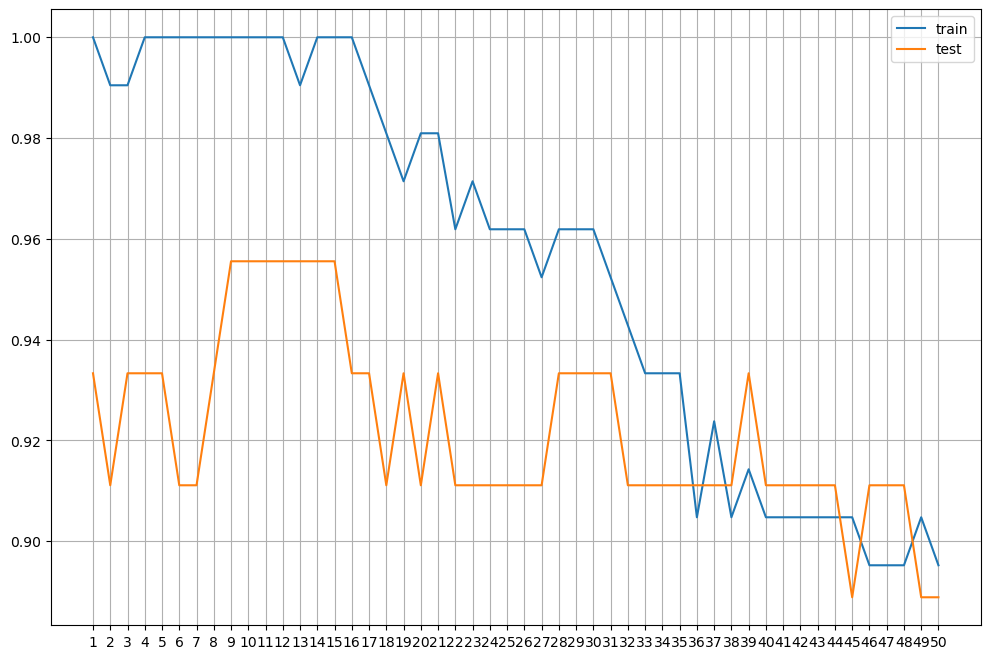

In [64]:
# 정확도 시각화
plt.figure(figsize=(12, 8))

plt.plot(n_set, train_list, label="train")
plt.plot(n_set, test_list, label='test')

plt.grid()
plt.legend()
plt.xticks(range(1,51))

plt.show()

# 9 ~ 12 정도의 k(이웃)수가 가장 좋은 일반화 성능을 보임!